In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
crop_filepath = "C:\\Users\\Shree123\\MACHINE LEARNING PROJECT TYCS\\Datasets\\Crop_recommendation.csv"

In [33]:
crop_data = pd.read_csv(crop_filepath)
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [34]:
X = crop_data.drop(columns = 'label' , inplace = False)
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [35]:
y = crop_data['label']

In [36]:
X_train , X_test , y_train , y_test = train_test_split(X,y ,test_size = 0.3,random_state = 0)

In [37]:
Gaussian_model = GaussianNB()

In [38]:
Gaussian_model.fit(X_train,y_train)

GaussianNB()

In [39]:
y_pred = Gaussian_model.predict(X_test)
y_pred

array(['watermelon', 'watermelon', 'grapes', 'chickpea', 'blackgram',
       'jute', 'mothbeans', 'kidneybeans', 'muskmelon', 'banana',
       'mothbeans', 'coffee', 'lentil', 'mungbean', 'mango', 'apple',
       'coffee', 'lentil', 'coffee', 'mango', 'coconut', 'blackgram',
       'kidneybeans', 'jute', 'cotton', 'coffee', 'lentil', 'orange',
       'mothbeans', 'kidneybeans', 'pomegranate', 'rice', 'maize',
       'muskmelon', 'coconut', 'cotton', 'mango', 'mango', 'watermelon',
       'mothbeans', 'maize', 'blackgram', 'pigeonpeas', 'watermelon',
       'pigeonpeas', 'mungbean', 'kidneybeans', 'kidneybeans', 'cotton',
       'mungbean', 'mothbeans', 'blackgram', 'apple', 'muskmelon',
       'pigeonpeas', 'banana', 'papaya', 'mango', 'lentil', 'cotton',
       'orange', 'mungbean', 'watermelon', 'rice', 'muskmelon', 'apple',
       'grapes', 'coffee', 'apple', 'orange', 'coconut', 'pomegranate',
       'kidneybeans', 'maize', 'grapes', 'mothbeans', 'chickpea', 'maize',
       'jute',

In [40]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9939


In [41]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

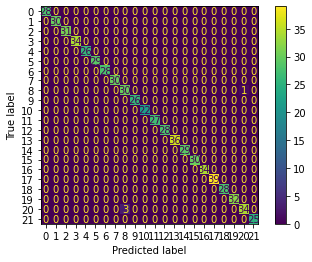

In [42]:
cm = confusion_matrix(y_test , y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm )
disp.plot()
plt.show()

In [43]:
#  Logistic Regression (By Standardization a.k.a Z_score normalization)

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [46]:
df = pd.read_csv("C:\\Users\\Shree123\\MACHINE LEARNING PROJECT TYCS\\Datasets\\diabetes.csv")

In [47]:
data = df[['Glucose' , 'BloodPressure' , 'BMI' , 'Age','Outcome']]

In [48]:
data.shape

(768, 5)

In [49]:
data.sample(5)

,Glucose,BloodPressure,BMI,Age,Outcome
433,139,75,25.6,29,0
534,77,56,33.3,24,0
150,136,74,37.4,24,0
329,105,70,30.8,37,0
524,125,58,31.6,24,0


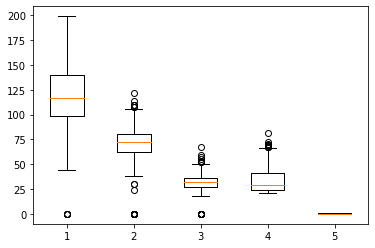

In [50]:
plt.boxplot(data)
plt.show()

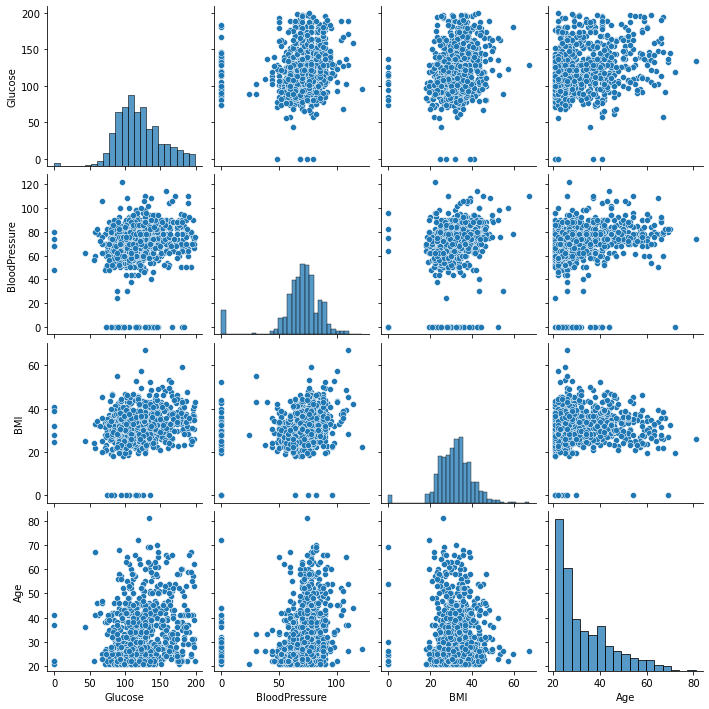

In [51]:
sns.pairplot(data[['Glucose','BloodPressure','BMI','Age']])
plt.show()

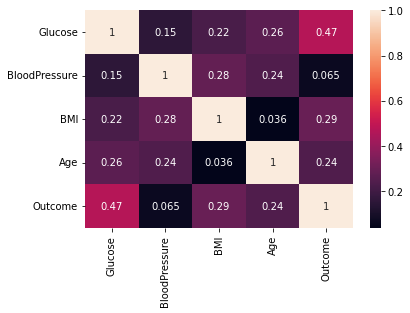

In [52]:
sns.heatmap(data.corr() , annot = True)
plt.show()

In [53]:
X = data.iloc[:,:4]
X.head(5)

,Glucose,BloodPressure,BMI,Age
0,148,72,33.6,50
1,85,66,26.6,31
2,183,64,23.3,32
3,89,66,28.1,21
4,137,40,43.1,33


In [54]:
y = data['Outcome']

In [55]:
X_train , X_test , y_train , y_test = train_test_split(X,y,train_size = 0.7 , test_size = 0.3 , random_state = 0)

In [56]:
X_train.shape

(537, 4)

In [57]:
X_test.shape

(231, 4)

In [58]:
scale = StandardScaler()
# fit the scaler to the train set, it will learn the parameters
scale.fit(X_train)

StandardScaler()

In [59]:
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

In [60]:
scale.mean_

array([121.54376164,  69.66666667,  32.25512104,  33.67039106])

In [61]:
X_train

,Glucose,BloodPressure,BMI,Age
580,151,90,42.1,21
418,83,68,18.2,27
764,122,70,36.8,27
363,146,78,38.5,67
757,123,72,36.3,52
...,...,...,...,...
763,101,76,32.9,63
192,159,66,30.4,36
629,94,65,24.7,21
559,85,74,30.1,35


In [62]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns = X_test.columns)

In [63]:
#  Mean - 0 , S.D = 1 check
np.round(X_train_scaled.describe() ,1)

,Glucose,BloodPressure,BMI,Age
count,537.0,537.0,537.0,537.0
mean,0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0
min,-3.8,-3.6,-4.0,-1.1
25%,-0.7,-0.3,-0.6,-0.8
50%,-0.1,0.1,0.0,-0.4
75%,0.6,0.5,0.6,0.6
max,2.4,2.7,4.3,3.9


In [64]:
#  Without Standardization
np.round(X_train.describe() ,1)

,Glucose,BloodPressure,BMI,Age
count,537.0,537.0,537.0,537.0
mean,121.5,69.7,32.3,33.7
std,32.2,19.5,8.0,12.0
min,0.0,0.0,0.0,21.0
25%,99.0,64.0,27.5,24.0
50%,118.0,72.0,32.4,29.0
75%,142.0,80.0,36.8,41.0
max,198.0,122.0,67.1,81.0


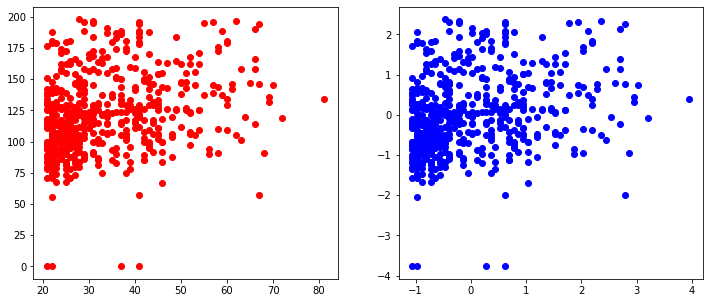

In [65]:
fig , (ax1,ax2) = plt.subplots(ncols = 2 , figsize = (12,5))
ax1.scatter(X_train['Age'] , X_train['Glucose'] , color = 'Red')
ax2.scatter(X_train_scaled['Age'] , X_train_scaled['Glucose'] , color = 'Blue')


In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
model1 = LogisticRegression()
model2_scaled  = LogisticRegression()

In [68]:
model1.fit(X_train , y_train)
model2_scaled.fit(X_train_scaled , y_train)

LogisticRegression()

In [69]:
y_pred = model1.predict(X_test)
y_pred_scaled = model2_scaled.predict(X_test_scaled)

In [70]:
from sklearn.metrics import roc_auc_score

In [71]:
print('Accuracy Score OG model:' , roc_auc_score(y_pred , y_test))
print('Accuracy Score Standardized Model :' , roc_auc_score(y_pred_scaled , y_test))

Accuracy Score OG model: 0.7350508271875623
Accuracy Score Standardized Model : 0.7350508271875623


In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
df = pd.read_csv("C:\\Users\\Shree123\\MACHINE LEARNING PROJECT TYCS\\Datasets\\Social_Network_Ads.csv")

In [76]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
371,15774744,Male,60,83000,1
354,15699619,Male,36,99000,1
340,15588080,Female,53,104000,1
343,15629739,Female,47,51000,1
122,15724423,Female,40,75000,0


In [77]:
df = df.iloc[:,2:]

In [78]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [79]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [80]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


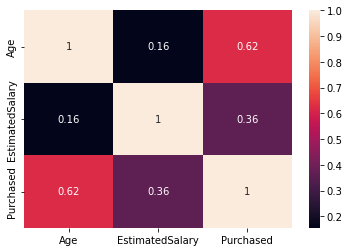

In [81]:
sns.heatmap(df.corr() , annot = True)
plt.show()

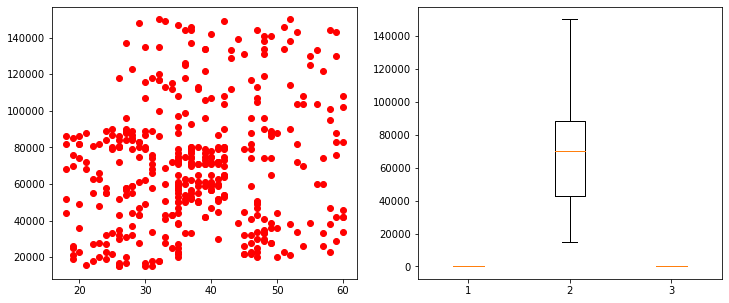

In [82]:
fig, (ax1,ax2) = plt.subplots( ncols = 2 , figsize = (12,5))
ax1.scatter(df['Age'] , df['EstimatedSalary'] , color = 'Red')
ax2.boxplot(df)
plt.show()

In [83]:
X = df.iloc[:,:2]

In [84]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [85]:
y = df.iloc[:,-1:]

In [86]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [87]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 0 , test_size = 0.3)

In [88]:
X_train.shape , X_test.shape

((280, 2), (120, 2))

In [89]:
Scaler = StandardScaler()

In [90]:
y_train.shape

(280, 1)

In [91]:
#  TO make the Scaler learn the model parameters
Scaler.fit(X_train)

StandardScaler()

In [92]:
X_train_scaled = Scaler.transform(X_train)
X_test_scaled = Scaler.transform(X_test)

In [93]:
Scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [94]:
# Convert array onto the DataFrame

In [95]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns = X_test.columns)

In [96]:
np.round(X_train_scaled.describe() ,1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [97]:
model = LogisticRegression()

In [98]:
import warnings 
warnings.filterwarnings('ignore')

In [99]:
model.fit(X_train_scaled , y_train)

LogisticRegression()

In [100]:
y_pred = model.predict(X_test_scaled)

In [101]:
print('Score :',roc_auc_score(y_test,y_pred))

Score : 0.8342080889163321


In [102]:
from sklearn.metrics import accuracy_score

In [103]:
accuracy_score(y_test , y_pred)

0.8666666666666667